In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
import nltk
import gensim.downloader
import tqdm
from wordcloud import WordCloud,STOPWORDS
from matplotlib.figure import Figure
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from gensim.models import Word2Vec

In [2]:
sns.set()

In [3]:
df = pd.read_csv("data.csv")
df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [4]:
df.describe()

,clickbait
count,32000.000000
mean,0.499969
std,0.500008
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df["clickbait"].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

<AxesSubplot:xlabel='clickbait', ylabel='count'>

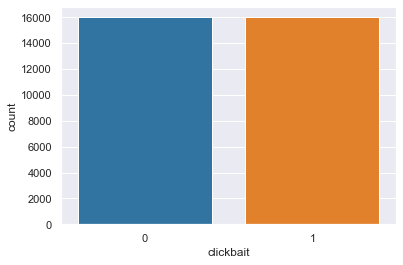

In [6]:
sns.countplot(x = 'clickbait',data = df, palette='tab10')

In [7]:
df["token_len"] = [len(s.split()) for s in df["headline"]]
df["start_with_number"] = [int((s[0].isdigit())) for s in df["headline"]]

In [8]:
df.sample(10)

,headline,clickbait,token_len,start_with_number
8644,David Bowie's Son Revealed He's Going To Be A ...,1,15,0
15126,"These Three Questions Will Determine Which ""Ha...",1,14,0
10209,30 Face Swaps That Will Make You Really Uncomf...,1,9,1
11276,Sarah Jessica Parker Had Trouble Not Judging H...,1,13,0
6620,"22 Times The Internet Perfectly Understood ""De...",1,7,1
25033,Surviving Tuskegee Airmen Salute Another Trail...,0,6,0
31515,Gunmen abduct aid workers in Sudan,0,6,0
7144,Which Latina Beauty Bloggers Should Everyone B...,1,11,0
6152,Ellen DeGeneres Scared The Shit Out Of Emily B...,1,16,0
21878,"On a Hike, Blazing Trails With Phone Software",0,8,0


In [9]:
df.describe()

,clickbait,token_len,start_with_number
count,32000.000000,32000.000000,32000.000000
mean,0.499969,9.065156,0.198719
std,0.500008,2.603603,0.399042
min,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000
50%,0.000000,9.000000,0.000000
75%,1.000000,11.000000,0.000000
max,1.000000,26.000000,1.000000


In [10]:
df["start_with_number"].value_counts()

0    25641
1     6359
Name: start_with_number, dtype: int64

<AxesSubplot:xlabel='start_with_number', ylabel='count'>

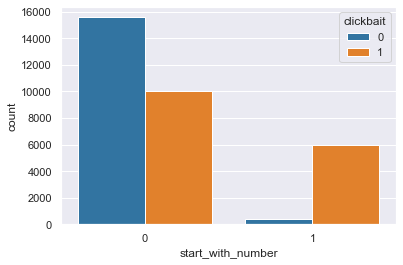

In [11]:
sns.countplot(data = df ,x='start_with_number', hue='clickbait', palette='tab10')

<AxesSubplot:xlabel='start_with_number', ylabel='count'>

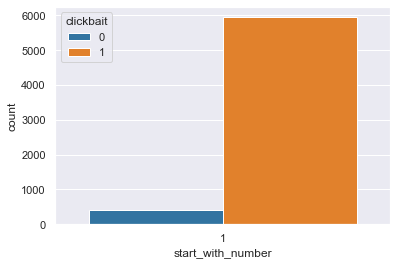

In [12]:
sns.countplot(data = df ,x='start_with_number', hue='clickbait', palette='tab10',
              order=df.start_with_number.value_counts().iloc[1:].index)

<AxesSubplot:xlabel='token_len', ylabel='count'>

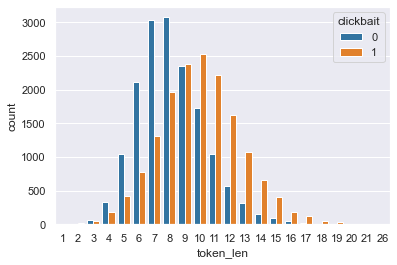

In [13]:
sns.countplot(data = df ,x='token_len',hue='clickbait', palette='tab10')

In [14]:
lemmatizer = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))

In [15]:
def preprocess(news):
    news = re.sub('\n', '', news)
    news = news.lower()
    news = re.sub(r'[^\w\s]',' ', news)
#     news = re.sub(r'\d+', '', news) 
    news = nltk.word_tokenize(news)
    news = [i for i in news if not i in stop_words_nltk]
    return news

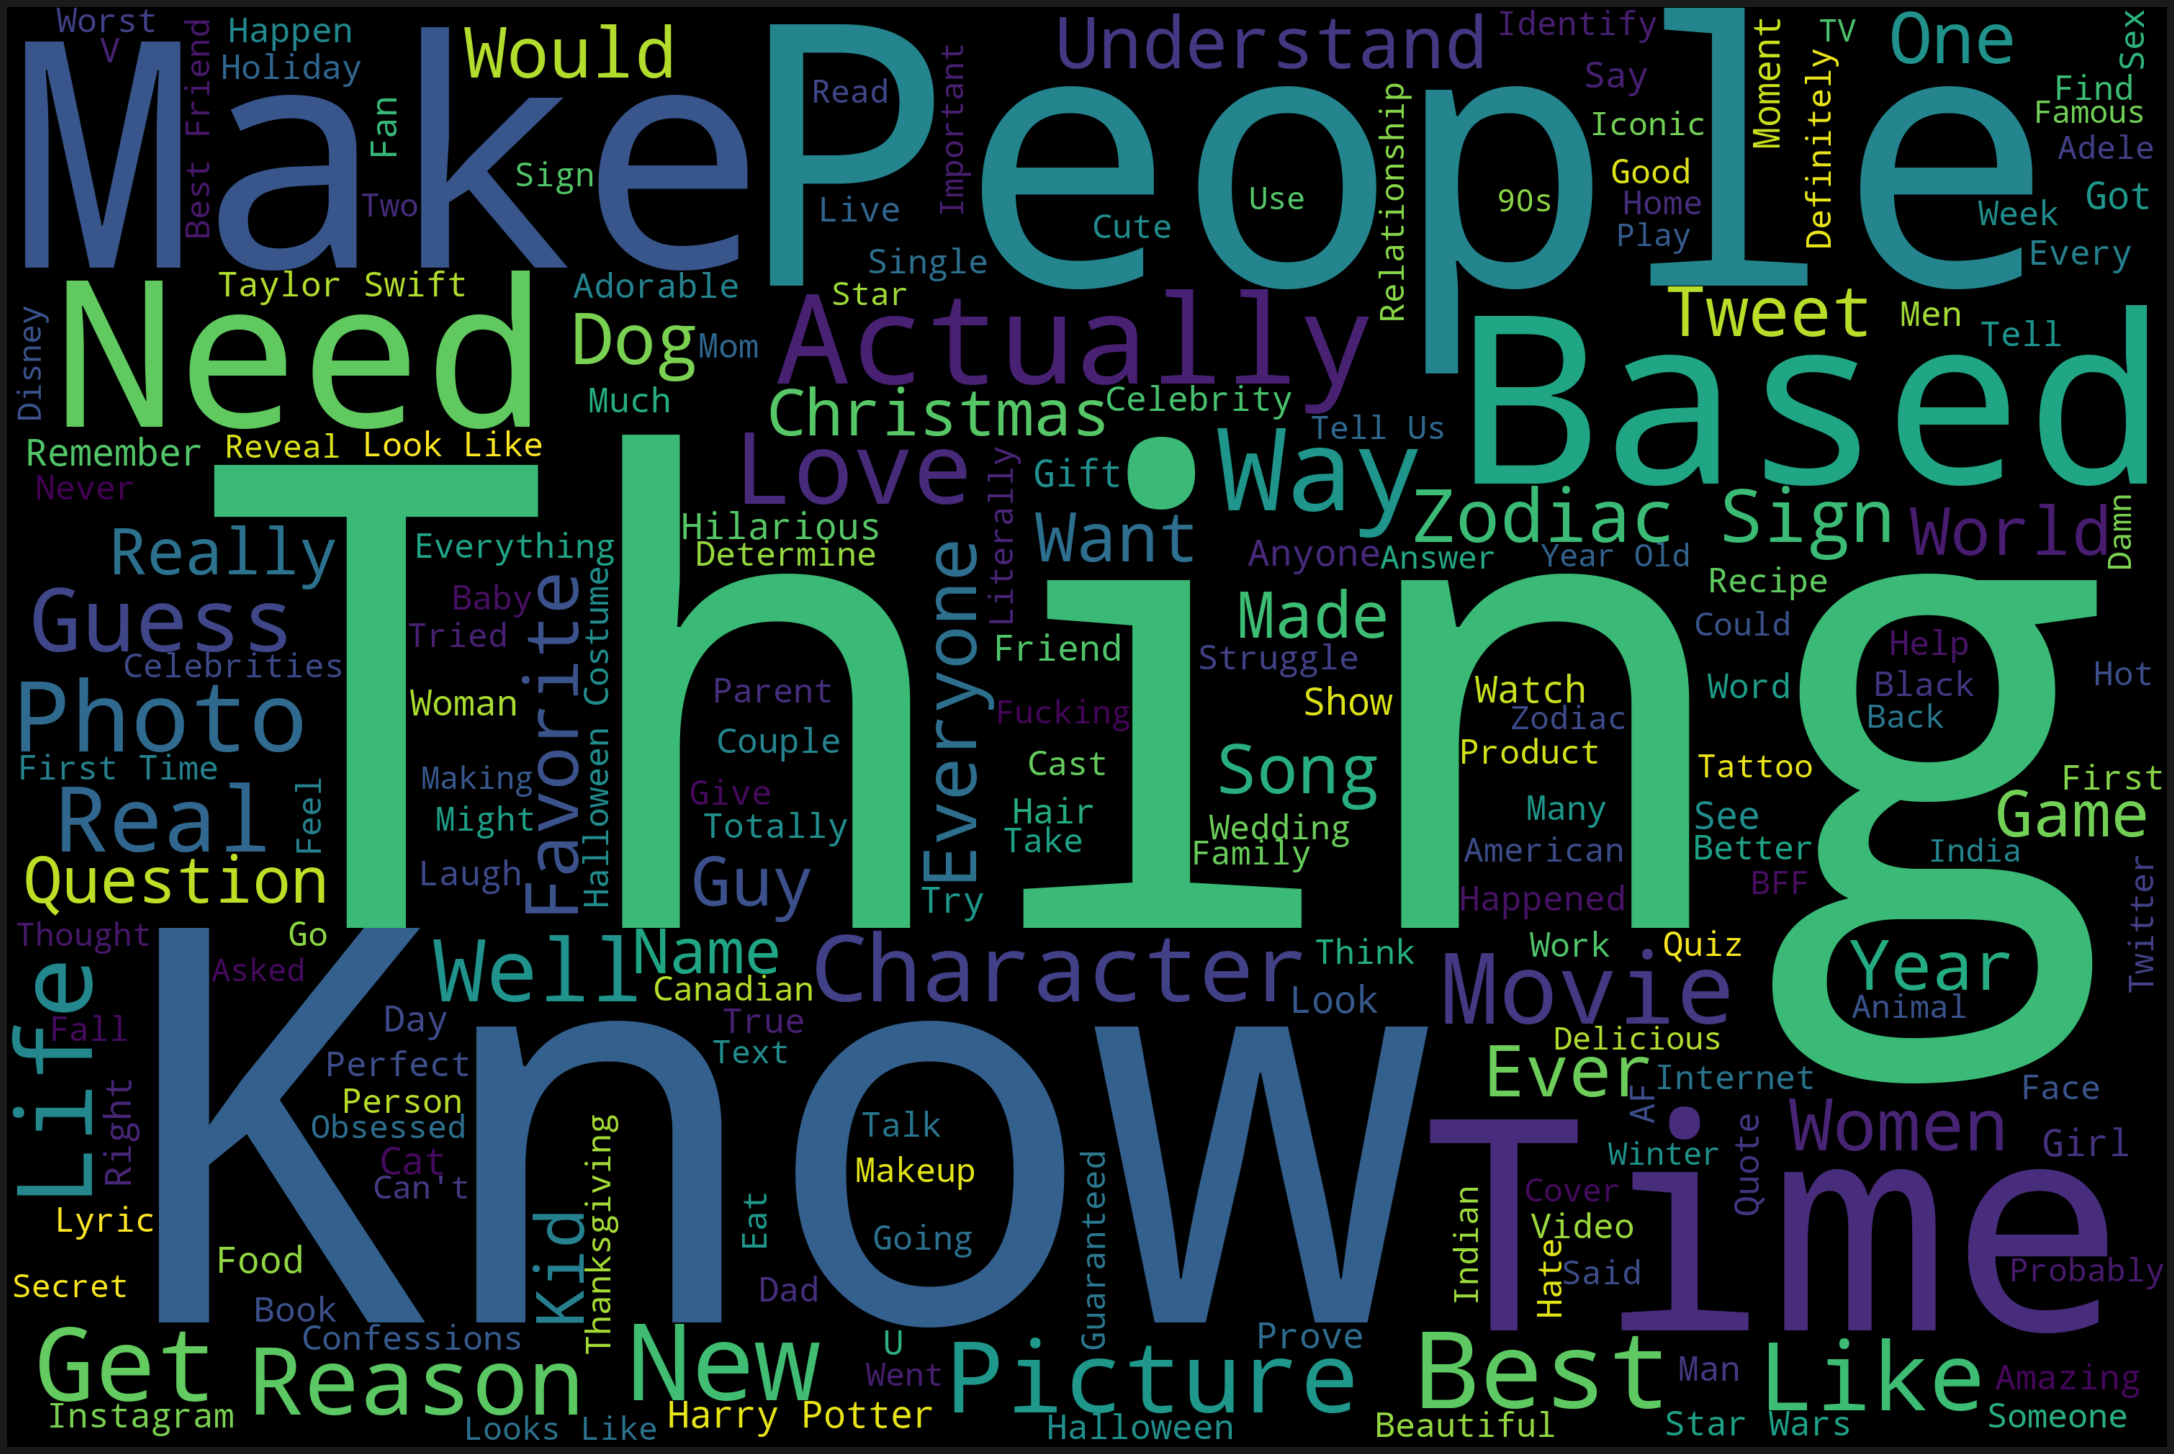

In [17]:
#Word Cloud
text = ''
for news in df[df.clickbait == 1].headline:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

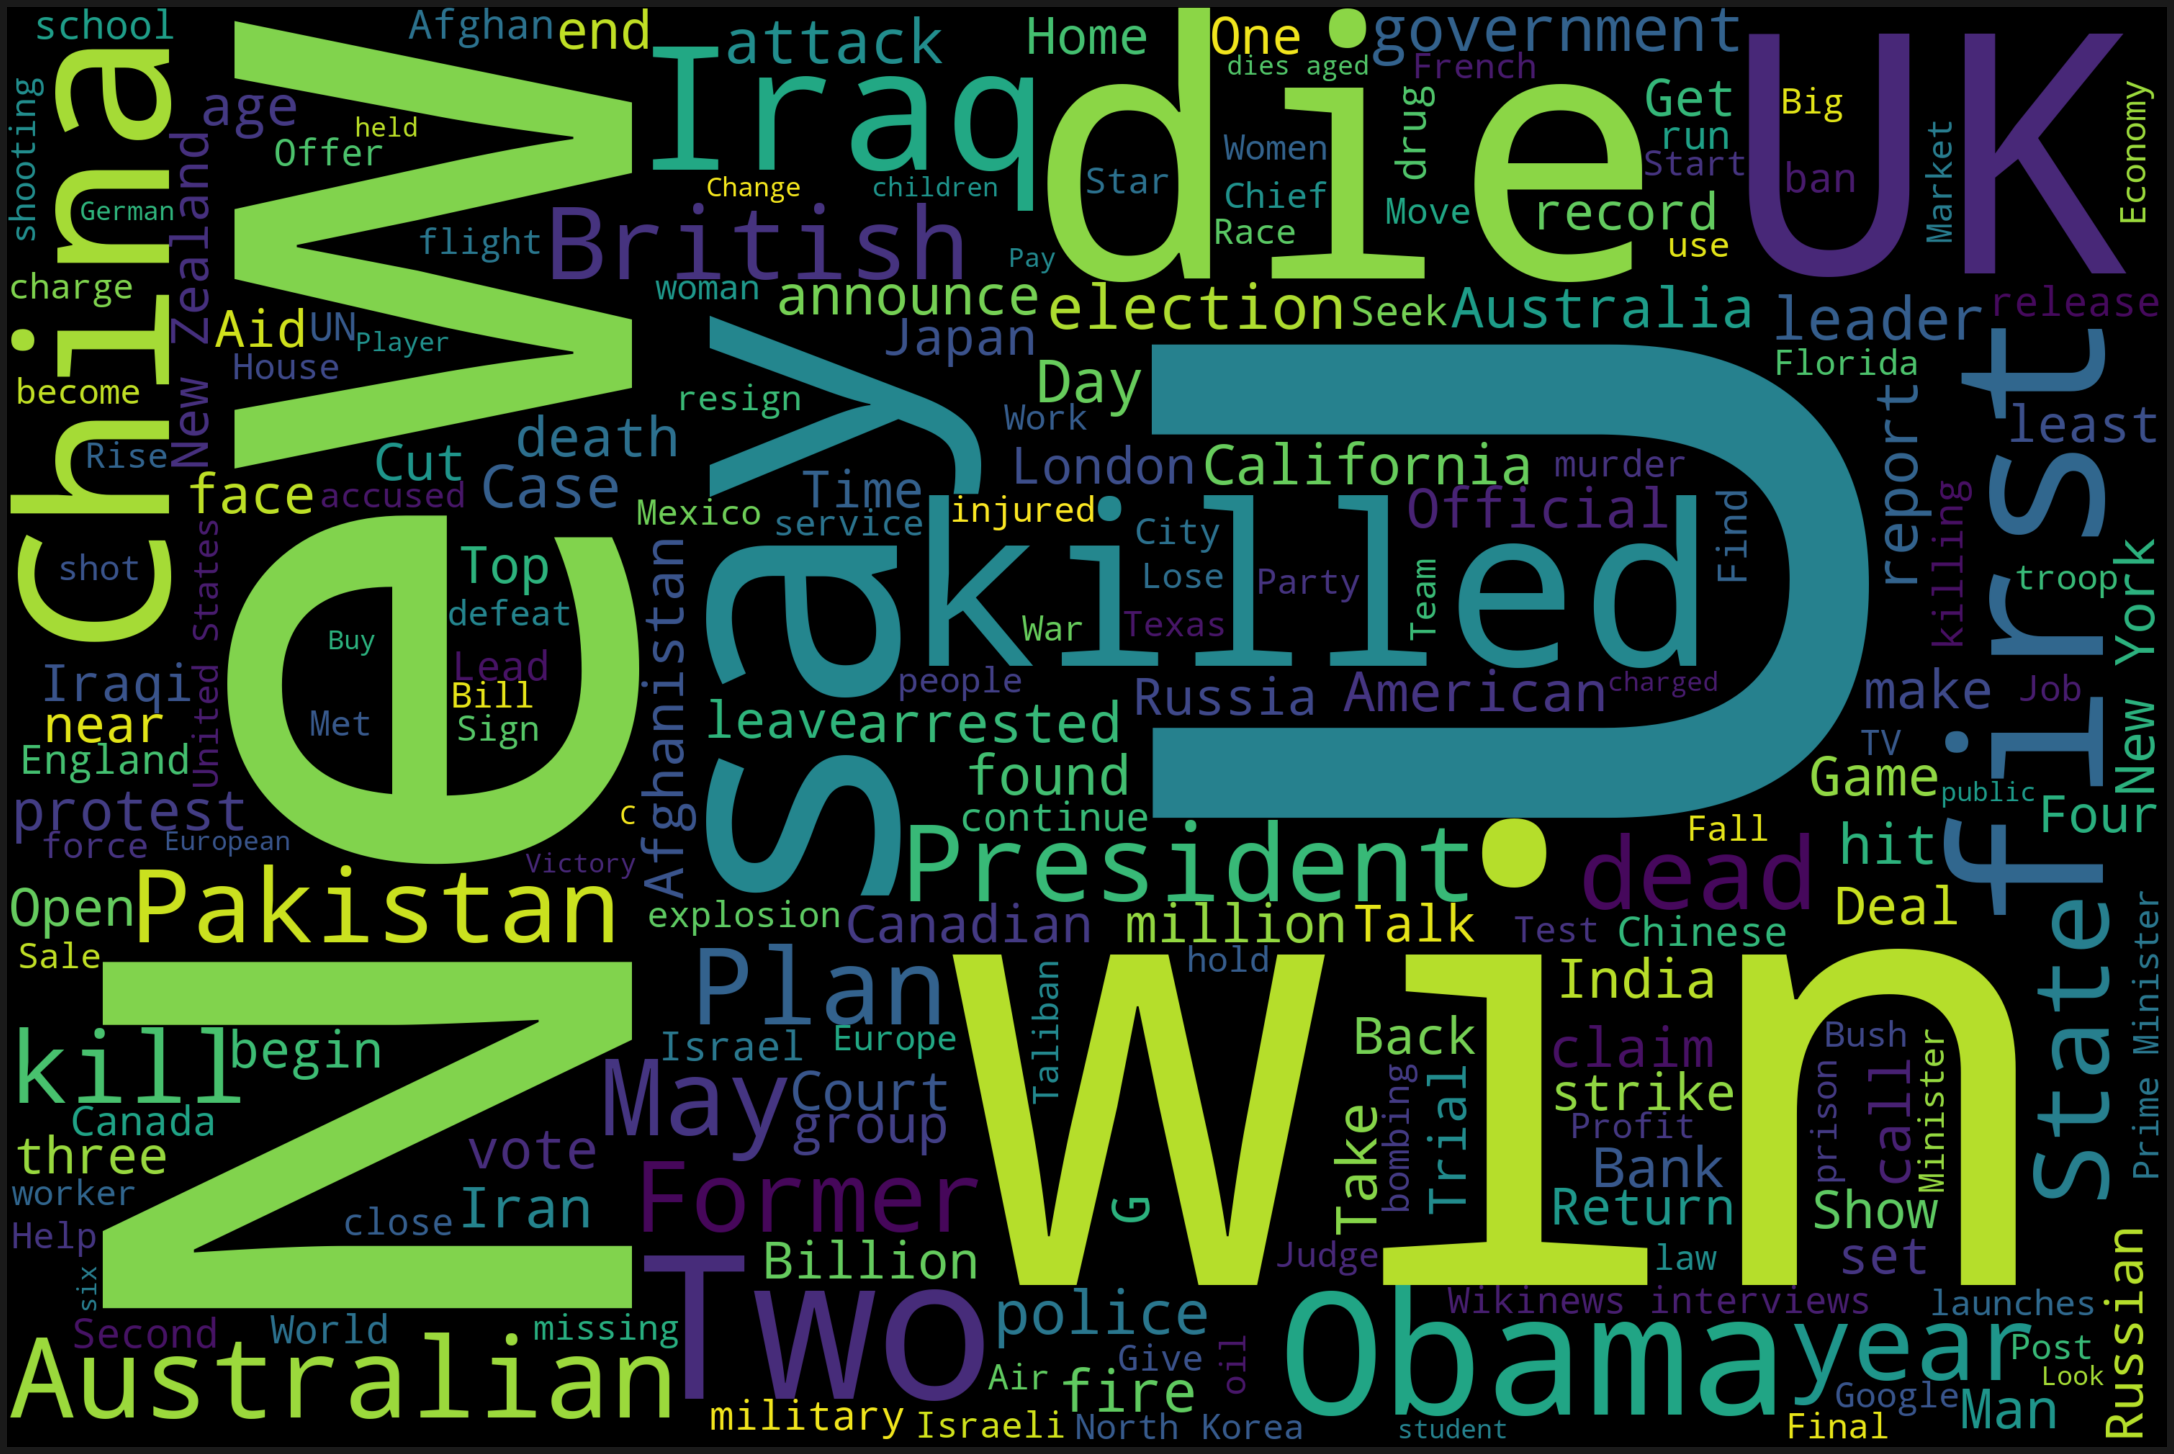

In [18]:
#Word Cloud
text = ''
for news in df[df.clickbait == 0].headline:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [19]:
# df['headline'] = df['headline'].apply(preprocess)

In [20]:
df

,headline,clickbait,token_len,start_with_number
0,Should I Get Bings,1,4,0
1,Which TV Female Friend Group Do You Belong In,1,9,0
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,14,0
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,12,0
4,A Couple Did A Stunning Photo Shoot With Their...,1,18,0
...,...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0,10,0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0,9,0
31997,Drone smartphone app to help heart attack vict...,0,12,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,9,0


In [21]:
duplicates = df.duplicated().sum()
print('No. of duplicate records :',duplicates)

No. of duplicate records : 0


In [22]:
features = df.drop(columns='clickbait')
y = df['clickbait']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=True, random_state=420)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25600, 3)
(25600,)
(6400, 3)
(6400,)


In [24]:
tfidf = TfidfVectorizer(max_features = 100)

tfidf_text_train = tfidf.fit_transform(X_train['headline'])
tfidf_text_test = tfidf.transform(X_test['headline'])

X_train_ef = X_train.drop(columns='headline')
X_test_ef = X_test.drop(columns='headline')

In [25]:
X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()

In [26]:
print(X_train.shape)
print(X_test.shape)

(25600, 102)
(6400, 102)


Logistic Regression

In [28]:
model_le=LogisticRegression(max_iter= 10000, random_state=420)
model_le.fit(X_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(X_train,y_train))
print('Logistic Regression score:',model_le_grid.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 0.8}
Logistic Regression Train score: 0.9276171875
Logistic Regression score: 0.92640625


In [29]:
logreg = LogisticRegression(max_iter= 10000, random_state = 420, C=0.8)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.8, max_iter=10000, random_state=420)

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3150
           1       0.94      0.91      0.92      3250

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



In [32]:
print('Train Score', logreg.score(X_train, y_train))
print('Test Score', logreg.score(X_test, y_test))

Train Score 0.927265625
Test Score 0.92375


In [33]:
confusion_matrix(y_test,y_pred)

array([[2962,  188],
       [ 300, 2950]], dtype=int64)

SVM

In [34]:
# model_svc=SVC(random_state=420)
# parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
# model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
# print(model_svc_grid.best_params_)


# print('Support Vecktor Classification score:',model_svc_grid.best_score_)

In [35]:
svc = SVC(random_state=420,C=1.2,degree=3,kernel='rbf')
svc.fit(X_train, y_train)
print('Train Score', svc.score(X_train, y_train))
print('Test Score', svc.score(X_test, y_test))

Train Score 0.9222265625
Test Score 0.9134375


In [36]:
y_pred = svc.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[2956,  194],
       [ 360, 2890]], dtype=int64)

Decision Tree Classifier

In [38]:
# model_dtc=DecisionTreeClassifier()
# parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# model_dtc_grid = GridSearchCV(model_dtc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
# print(model_dtc_grid.best_params_)

# print('Decision Tree Classifier score:',model_dtc_grid.best_score_)

In [39]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=70, random_state = 420)
dtc.fit(X_train,y_train)
print('Train Score', dtc.score(X_train, y_train))
print('Test Score', dtc.score(X_test, y_test))

Train Score 0.9771484375
Test Score 0.90375


In [40]:
y_pred = dtc.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[2910,  240],
       [ 376, 2874]], dtype=int64)

Random Forest Classifier

In [42]:
# model_rfc=RandomForestClassifier(n_jobs=-1)
# parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
# model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
# print(model_rfc_grid.best_params_)

# print('Random Forest Classifier score:',model_rfc_grid.best_score_)

In [43]:
rfc = RandomForestClassifier(n_estimators=300, random_state=420,max_depth=6)
rfc.fit(X_train,y_train)
print('Train Score', rfc.score(X_train, y_train))
print('Test Score', rfc.score(X_test, y_test))

Train Score 0.8975390625
Test Score 0.89078125


In [44]:
y_pred = rfc.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[2994,  156],
       [ 543, 2707]], dtype=int64)

Bagging Classifier

In [46]:
# model_bc=BaggingClassifier()
# parameters = {'n_estimators': [2, 5, 10, 15, 20, 50, 100] ,'max_features': [0.5, 0.7, 1.0],'max_samples': [0.5, 0.7, 1.0]}
# model_bc_grid = GridSearchCV(model_bc, parameters, n_jobs = -1, cv = 10, verbose = 1).fit(X_train,y_train)
# print(model_bc_grid.best_params_)

# print('Bagging Classifier score:',model_bc_grid.best_score_)

In [47]:
bc = BaggingClassifier(max_features= 0.7, max_samples= 0.5, n_estimators= 50, random_state=420)
bc.fit(X_train,y_train)
print('Train Score', bc.score(X_train, y_train))
print('Test Score', bc.score(X_test, y_test))

Train Score 0.9670703125
Test Score 0.9228125


In [48]:
y_pred = bc.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[2952,  198],
       [ 296, 2954]], dtype=int64)

In [50]:
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=0)
    
    return accuracy,precision

In [51]:
models = { 
    'LogisticRegression': logreg, 
    'SupportVectorClassifier': svc,
    'DecisionTreeClassifier': dtc, 
    'RandomForestClassifier': rfc, 
    'BaggingClassifier': bc
}

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,LogisticRegression,0.923750,0.940089
4,BaggingClassifier,0.922813,0.937183
1,SupportVectorClassifier,0.913438,0.937095
2,DecisionTreeClassifier,0.903750,0.922929
3,RandomForestClassifier,0.890781,0.945512


In [52]:
from gensim.models import Word2Vec
import gensim.downloader

In [53]:
word2vec = gensim.downloader.load('word2vec-google-news-300')

In [54]:
df

,headline,clickbait,token_len,start_with_number
0,Should I Get Bings,1,4,0
1,Which TV Female Friend Group Do You Belong In,1,9,0
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,14,0
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,12,0
4,A Couple Did A Stunning Photo Shoot With Their...,1,18,0
...,...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0,10,0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0,9,0
31997,Drone smartphone app to help heart attack vict...,0,12,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,9,0


In [55]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle = True, random_state=420)
print(train_df)
print(test_df)

                                                headline  clickbait  \
9146     17 Valentine's Day Cards Long Term Couples Need          1   
8854   29 Incredible Cakes For The Drake Fan In All O...          1   
27945                        Zimbabwean unity talks fail          0   
5128   24 Subtly Spooky Halloween Decorations You Can...          1   
27014         As It Falters, Eastern Europe Raises Risks          0   
...                                                  ...        ...   
29471  Baldwin, Seymour among attendees at Oscar view...          0   
21055               Georgia withdraws from South Ossetia          0   
20870          Kwaśniewski to end his term within 5 days          0   
29768  Payment Plan for Northern Ireland Reconciliati...          0   
11185  This Puppy Sort Of Lost It When He Was Caught ...          1   

       token_len  start_with_number  
9146           8                  1  
8854          11                  1  
27945          4                 

In [56]:
def compute_embeddings(df):
    train_emb = []
    for i, row in tqdm.tqdm(df.iterrows(), total = len(df.index)):
        words = row['headline'].split(' ')
        words = filter(lambda x: x in word2vec.key_to_index, words)
        text_emb = [word2vec[word] for word in words]
        
        if len(text_emb) == 0:
            train_emb.append(np.zeros(300))
            continue

        doc_embedding = np.mean(text_emb, axis = 0)
        train_emb.append(doc_embedding)
    return np.array(train_emb)

In [57]:
X_train_emb = compute_embeddings(train_df)
y_train = train_df['clickbait']

X_test_emb = compute_embeddings(test_df)
y_test = test_df['clickbait']

100%|███████████████████████████████████████████████████████████████████████████| 6400/6400 [00:00<00:00, 11072.01it/s]


In [58]:
print(X_train_emb.shape)
print(y_train.shape)
print(X_test_emb.shape)
print(y_test.shape)

(25600, 300)
(25600,)
(6400, 300)
(6400,)


Logistic Regression

In [59]:
model_le=LogisticRegression(max_iter= 10000, random_state=420)
model_le.fit(X_train_emb,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(X_train_emb,y_train))
print('Logistic Regression score:',model_le_grid.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 1.2}
Logistic Regression Train score: 0.9846484375
Logistic Regression score: 0.9819531249999999


In [60]:
logreg = LogisticRegression(max_iter= 10000, random_state = 420, C=1.2)
logreg.fit(X_train_emb, y_train)

LogisticRegression(C=1.2, max_iter=10000, random_state=420)

In [61]:
y_pred = logreg.predict(X_test_emb)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3150
           1       0.98      0.99      0.98      3250

    accuracy                           0.98      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.98      0.98      0.98      6400



In [63]:
print('Train Score', logreg.score(X_train_emb, y_train))
print('Test Score', logreg.score(X_test_emb, y_test))

Train Score 0.9849609375
Test Score 0.98140625


In [64]:
confusion_matrix(y_test,y_pred)

array([[3074,   76],
       [  43, 3207]], dtype=int64)

SVM

In [65]:
# model_svc=SVC(random_state=420)
# parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
# model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
# print(model_svc_grid.best_params_)


# print('Support Vecktor Classification score:',model_svc_grid.best_score_)

In [66]:
svc = SVC(random_state=420,C=1.2,degree=3,kernel='poly')
svc.fit(X_train_emb, y_train)
print('Train Score', svc.score(X_train_emb, y_train))
print('Test Score', svc.score(X_test_emb, y_test))

Train Score 0.996796875
Test Score 0.98734375


In [67]:
y_pred = svc.predict(X_test_emb)

In [68]:
confusion_matrix(y_test,y_pred)

array([[3095,   55],
       [  26, 3224]], dtype=int64)

Decision Tree Classifier

In [69]:
# model_dtc=DecisionTreeClassifier()
# parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# model_dtc_grid = GridSearchCV(model_dtc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
# print(model_dtc_grid.best_params_)

# print('Decision Tree Classifier score:',model_dtc_grid.best_score_)

In [70]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=9, random_state = 420)
dtc.fit(X_train_emb,y_train)
print('Train Score', dtc.score(X_train_emb, y_train))
print('Test Score', dtc.score(X_test_emb, y_test))

Train Score 0.9753515625
Test Score 0.93125


In [71]:
y_pred = dtc.predict(X_test_emb)

In [72]:
confusion_matrix(y_test,y_pred)

array([[2907,  243],
       [ 197, 3053]], dtype=int64)

Random Forest Classifier

In [73]:
# model_rfc=RandomForestClassifier(n_jobs=-1)
# parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
# model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
# print(model_rfc_grid.best_params_)

# print('Random Forest Classifier score:',model_rfc_grid.best_score_)

In [74]:
rfc = RandomForestClassifier(n_estimators=300, random_state=420,max_depth=6)
rfc.fit(X_train_emb,y_train)
print('Train Score', rfc.score(X_train_emb, y_train))
print('Test Score', rfc.score(X_test_emb, y_test))

Train Score 0.969453125
Test Score 0.96328125


In [75]:
y_pred = rfc.predict(X_test_emb)

In [76]:
confusion_matrix(y_test,y_pred)

array([[2974,  176],
       [  59, 3191]], dtype=int64)

Bagging Classifier

In [77]:
# model_bc=BaggingClassifier()
# parameters = {'n_estimators': [2, 5, 10, 15, 20, 50, 100] ,'max_features': [0.5, 0.7, 1.0],'max_samples': [0.5, 0.7, 1.0]}
# model_bc_grid = GridSearchCV(model_bc, parameters, n_jobs = -1, cv = 10, verbose = 1).fit(X_train_emb,y_train)
# print(model_bc_grid.best_params_)

# print('Bagging Classifier score:',model_bc_grid.best_score_)

In [78]:
bc = BaggingClassifier(max_features= 0.7, max_samples= 0.5, n_estimators= 50, random_state=420)
bc.fit(X_train_emb,y_train)
print('Train Score', bc.score(X_train_emb, y_train))
print('Test Score', bc.score(X_test_emb, y_test))

Train Score 0.99484375
Test Score 0.96484375


In [79]:
y_pred = bc.predict(X_test_emb)

In [80]:
confusion_matrix(y_test,y_pred)

array([[3025,  125],
       [ 100, 3150]], dtype=int64)

In [83]:
models = { 
    'LogisticRegression': logreg, 
    'SupportVectorClassifier': svc,
    'DecisionTreeClassifier': dtc, 
    'RandomForestClassifier': rfc, 
    'BaggingClassifier': bc
}

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train_emb,y_train,X_test_emb,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,SupportVectorClassifier,0.987344,0.983227
0,LogisticRegression,0.981406,0.976850
4,BaggingClassifier,0.964844,0.961832
3,RandomForestClassifier,0.963281,0.947728
2,DecisionTreeClassifier,0.931250,0.926274
